In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import PrecisionRecallDisplay
from itertools import cycle

In [66]:
# import data as dataframe
df_test = pd.read_csv(
    "/data/dssg/occrp/data/output/document_classifier/AlexNet_2022_08_10-18_23_30/assessment/in_sample_test_predictions.csv",
    sep=",",
)
df_test

,bank-statements,company-registry,contracts,court-documents,gazettes,invoices,passport-scan,receipts,shipping-receipts,true-label,predicted
0,0.004930,0.001739,0.009146,0.015327,0.000811,0.014269,0.993350,0.000286,0.000240,passport-scan,passport-scan
1,0.052703,0.003578,0.010027,0.110358,0.052660,0.293001,0.001041,0.009775,0.027988,shipping-receipts,other
2,0.009571,0.000543,0.001023,0.000688,0.002670,0.035553,0.000487,0.995307,0.038500,receipts,receipts
3,0.000255,0.000042,0.000278,0.000183,0.000144,0.000699,0.000159,0.999995,0.000308,receipts,receipts
4,0.000782,0.001422,0.010274,0.007868,0.999922,0.000675,0.001432,0.004486,0.001581,gazettes,gazettes
...,...,...,...,...,...,...,...,...,...,...,...
158,0.001484,0.042588,0.009399,0.008162,0.020939,0.013794,0.000132,0.006183,0.993074,shipping-receipts,shipping-receipts
159,0.998800,0.005515,0.014161,0.000933,0.000529,0.003425,0.000178,0.000442,0.000309,bank-statements,bank-statements
160,0.008818,0.013242,0.032847,0.059261,0.001217,0.150331,0.001793,0.976732,0.006328,receipts,receipts
161,0.202189,0.132689,0.582872,0.347044,0.184371,0.151727,0.159092,0.091445,0.067096,contracts,other


In [67]:
# calcualte different classes
df_test["true-label"].nunique()

9

In [68]:
# rename column
df_test.rename(columns={"true-label": "true"}, inplace=True)

In [6]:
df_test["true"].value_counts()
# df_test["predicted"].value_counts()

passport-scan        20
shipping-receipts    20
receipts             20
gazettes             20
company-registry     20
invoices             20
bank-statements      20
contracts            13
court-documents      10
Name: true, dtype: int64

In [69]:
# transfrom true labels to one hot encoded
true_labels = pd.get_dummies(df_test.true)
# print(true_labels.head())
true_labels = LabelBinarizer().fit_transform(df_test.true)
true_labels

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [70]:
# transform predicted values to array
columns = df_test.columns[:-2]
print(columns)
predict_labels = df_test[
    [
        "bank-statements",
        "company-registry",
        "contracts",
        "court-documents",
        "gazettes",
        "invoices",
        "passport-scan",
        "receipts",
        "shipping-receipts",
    ]
].to_numpy()

predict_labels

Index(['bank-statements', 'company-registry', 'contracts', 'court-documents',
       'gazettes', 'invoices', 'passport-scan', 'receipts',
       'shipping-receipts'],
      dtype='object')


array([[4.9297750e-03, 1.7393833e-03, 9.1462570e-03, ..., 9.9334960e-01,
        2.8638708e-04, 2.4033015e-04],
       [5.2703030e-02, 3.5776450e-03, 1.0027090e-02, ..., 1.0407328e-03,
        9.7745900e-03, 2.7988251e-02],
       [9.5708910e-03, 5.4330240e-04, 1.0232271e-03, ..., 4.8699870e-04,
        9.9530680e-01, 3.8500380e-02],
       ...,
       [8.8182910e-03, 1.3241936e-02, 3.2846830e-02, ..., 1.7933624e-03,
        9.7673200e-01, 6.3279294e-03],
       [2.0218930e-01, 1.3268897e-01, 5.8287200e-01, ..., 1.5909179e-01,
        9.1445215e-02, 6.7096375e-02],
       [1.0289209e-01, 9.0513035e-04, 1.2098685e-04, ..., 6.9458756e-06,
        1.6943612e-03, 9.9437520e-01]])

In [71]:
len(true_labels)

163

In [72]:
len(predict_labels)

163

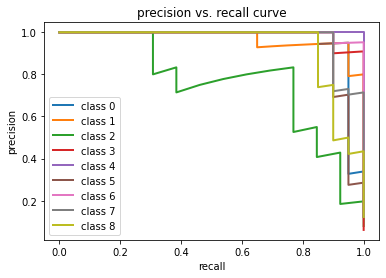

In [73]:
# plain precision recall curve
n_classes = 9
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(true_labels[:, i], predict_labels[:, i])
    plt.plot(recall[i], precision[i], lw=2, label="class {}".format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [74]:
# calculate precision recall for each class and also joined
n_classes = 9
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(true_labels[:, i], predict_labels[:, i])
    average_precision[i] = average_precision_score(true_labels[:, i], predict_labels[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(true_labels.ravel(), predict_labels.ravel())
average_precision["micro"] = average_precision_score(true_labels, predict_labels, average="micro")

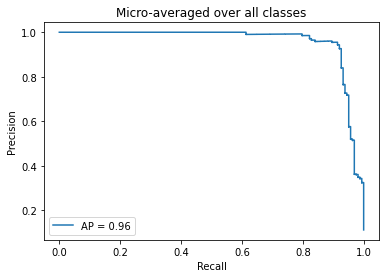

In [145]:
# plot aggreaged plot

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)

display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

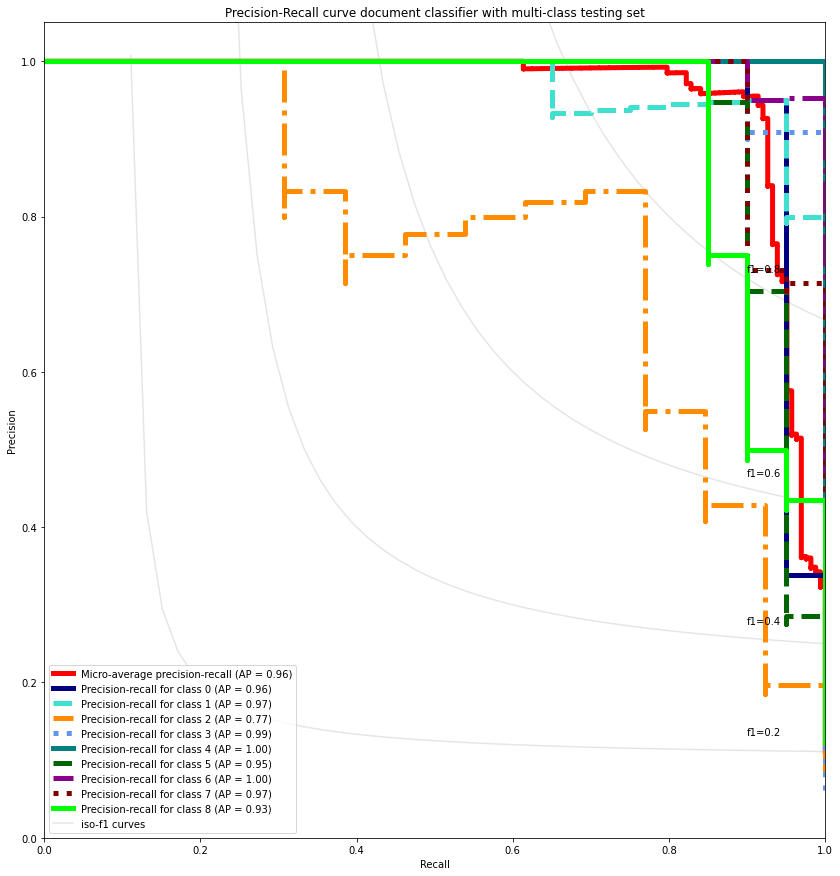

In [150]:
# plot graph with more information
n_classes = 9
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "darkgreen", "darkmagenta", "maroon", "lime"])
shape_list = ["-", "--", "-.", ":"]
linestyle = cycle(shape_list)

_, ax = plt.subplots(figsize=(14, 15))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="red", linewidth=5)

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color, linestyle=linestyle.__next__(), linewidth=5)


# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="lower left")
ax.set_title("Precision-Recall curve document classifier with multi-class testing set")


plt.show()

In [ ]:
#################
# Create precision recall curves individually
#################

In [ ]:
# create all individual  dataframe
df_gazette = df_test.copy()
df_passport = df_test.copy()
df_shipping_receipt = df_test.copy()
df_receipts = df_test.copy()
df_company_registry = df_test.copy()
df_invoices = df_test.copy()
df_bank_statement = df_test.copy()
df_contract = df_test.copy()
df_court_documents = df_test.copy()

In [ ]:
# transform gazettes true to 1 and everythin else to 0
df_gazette.true = df_gazette.true.map(
    {
        "gazettes": 1,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
    }
)
# transform gazettes predicted to 1 and everythin else to 0
df_gazette.predicted = df_gazette.predicted.map(
    {
        "gazettes": 1,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform passport true to 1 and everythin else to 0
df_passport.true = df_passport.true.map(
    {
        "gazettes": 0,
        "passport-scan": 1,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
    }
)
# transform passport predicted to 1 and everythin else to 0
df_passport.predicted = df_passport.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 1,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform shipping receipt to 1 and everythin else to 0
df_shipping_receipt.true = df_shipping_receipt.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 1,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
    }
)

df_shipping_receipt.predicted = df_shipping_receipt.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 1,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform receipt to 1 and everythin else to 0
df_receipts.true = df_receipts.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 1,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
    }
)

df_receipts.predicted = df_receipts.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 1,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform company registry to 1 and everythin else to 0
df_company_registry.true = df_company_registry.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 1,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
    }
)

df_company_registry.predicted = df_company_registry.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 1,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform invoices to 1 and everythin else to 0
df_invoices.true = df_invoices.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 1,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
    }
)

df_invoices.predicted = df_invoices.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 1,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform bank statements to 1 and everythin else to 0
df_bank_statement.true = df_bank_statement.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 1,
        "contracts": 0,
        "court-documents": 0,
    }
)

df_bank_statement.predicted = df_bank_statement.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 1,
        "contracts": 0,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform contracts to 1 and everythin else to 0
df_contract.true = df_contract.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 1,
        "court-documents": 0,
    }
)

df_contract.predicted = df_contract.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 1,
        "court-documents": 0,
        "other": 0,
    }
)

In [ ]:
# transform court documents to 1 and everythin else to 0
df_court_documents.true = df_court_documents.true.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 1,
    }
)

df_court_documents.predicted = df_court_documents.predicted.map(
    {
        "gazettes": 0,
        "passport-scan": 0,
        "shipping-receipts": 0,
        "receipts": 0,
        "company-registry": 0,
        "invoices": 0,
        "bank-statements": 0,
        "contracts": 0,
        "court-documents": 1,
        "other": 0,
    }
)

In [ ]:
# calculate precision recall
precision_gazette, recall_gazette, thresholds_gazette = precision_recall_curve(df_gazette.true, df_gazette.predicted)

precision_passport, recall_passport, thresholds_passport = precision_recall_curve(df_passport.true, df_passport.predicted)

precision_shipping, recall_shipping, thresholds_shipping = precision_recall_curve(
    df_shipping_receipt.true, df_shipping_receipt.predicted
)

precision_receipts, recall_receipts, thresholds_receipts = precision_recall_curve(df_receipts.true, df_receipts.predicted)

precision_company_registry, recall_company_registry, thresholds_company_registry = precision_recall_curve(
    df_company_registry.true, df_company_registry.predicted
)

precision_invoice, recall_invoice, thresholds_invoice = precision_recall_curve(df_invoices.true, df_invoices.predicted)

precision_bank, recall_bank, thresholds_bank = precision_recall_curve(df_bank_statement.true, df_bank_statement.predicted)

precision_contract, recall_contract, thresholds_contract = precision_recall_curve(df_contract.true, df_contract.predicted)

precision_court, recall_court, thresholds_court = precision_recall_curve(
    df_court_documents.true, df_court_documents.predicted
)

In [ ]:
# create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_gazette, precision_gazette, color="purple")
ax.plot(recall_passport, precision_passport, color="red")
ax.plot(recall_shipping, precision_shipping, color="blue")
ax.plot(recall_receipts, precision_receipts, color="yellow")
ax.plot(recall_company_registry, precision_company_registry, color="orange")
ax.plot(recall_invoice, precision_invoice, color="green")
ax.plot(recall_bank, precision_bank, color="gray")
ax.plot(recall_contract, precision_contract, color="black")
ax.plot(recall_court, precision_court, color="pink")
# add axis labels to plot
ax.set_title("Precision-Recall Curve")
ax.set_ylabel("Precision")
ax.set_xlabel("Recall")

# display plot
plt.show()